# imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, confusion_matrix, adjusted_rand_score, silhouette_score
from matplotlib.colors import ListedColormap
import os
os.environ['OMP_NUM_THREADS'] = '3'

# Data loading:

In [2]:
# Load the digits dataset
digits = datasets.load_digits()
data = digits.data
target = digits.target

# perform PCA:

In [3]:
pca = PCA(n_components=2)
data_with_pca = pca.fit_transform(data)
data_with_pca

array([[ -1.25946736,  21.27488406],
       [  7.95761231, -20.7686969 ],
       [  6.99192362,  -9.95598782],
       ...,
       [ 10.80128175,  -6.96025848],
       [ -4.87210001,  12.42395315],
       [ -0.34439202,   6.36554299]])

# split to 3 classes:

In [4]:
selected_digits = [0, 1, 2]
mask = np.isin(target, selected_digits)
data_selected = data_with_pca[mask]  
target_selected = target[mask]

# visualize the PCA-transformed data:

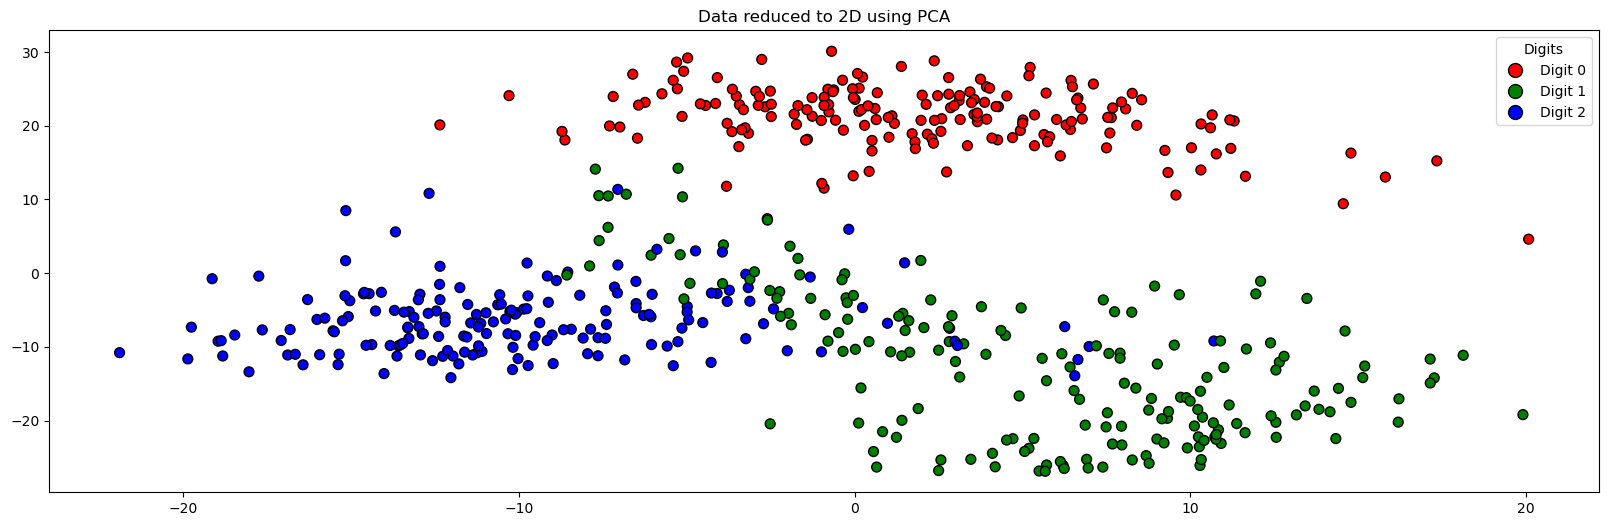

In [5]:
# Define new colors for the digits
new_colors = ['red', 'green', 'blue']
cmap = ListedColormap(new_colors)
# Plot the reduced data
plt.figure(figsize=(20, 6))
scatter = plt.scatter(data_selected[:, 0], data_selected[:, 1], c=target_selected, cmap=cmap, edgecolor='k', s=50)

# Create a legend
my_handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Digit {digit}', 
                      markerfacecolor=color, markersize=10, markeredgecolor='k') 
           for digit, color in zip(selected_digits, new_colors)]
plt.legend(handles=my_handles, title="Digits")

# Add titles and labels
plt.title('Data reduced to 2D using PCA')
# Display the plot
plt.show()

# K-Means algorithem:

In [6]:
def kmeans_find_k(initYype):
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init=initYype, n_init=100)
        kmeans.fit(data_selected)
        inertia.append(kmeans.inertia_)
    return inertia

kmeans1 = KMeans(n_clusters=3, init="random", n_init=100)
kmeans1.fit(data_selected)
labels_random = kmeans1.labels_

kmeans2 = KMeans(n_clusters=3, init="k-means++", n_init=100)
kmeans2.fit(data_selected)
labels_kmeanspp = kmeans2.labels_

c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


# visualize with the Elbow graph:

c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

22548.849022136168
22548.849022136168


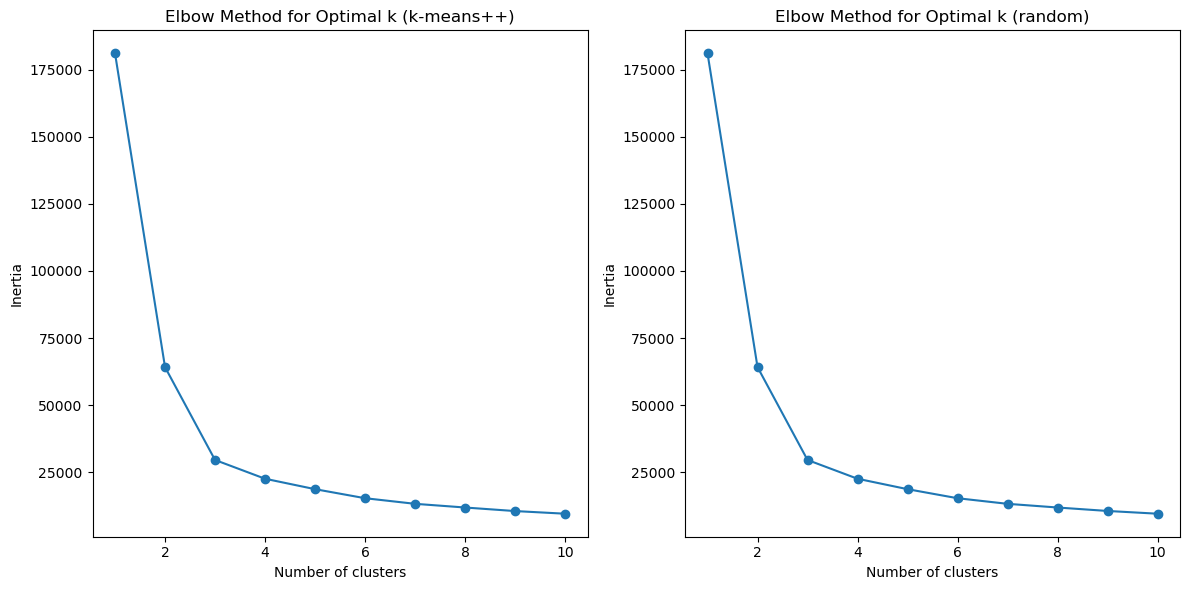

In [7]:
inertia1 = kmeans_find_k('k-means++')
inertia2 = kmeans_find_k('random')

print(inertia1[3])
print(inertia2[3])

# Plot the elbow method result side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].plot(range(1, 11), inertia1, marker='o')
axes[0].set_xlabel('Number of clusters')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k (k-means++)')

axes[1].plot(range(1, 11), inertia2, marker='o')
axes[1].set_xlabel('Number of clusters')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Method for Optimal k (random)')

plt.tight_layout()
plt.show()

## Elbow Method Analysis

The elbow method was applied to determine the optimal number of clusters (k) for K-Means clustering on selected digits (0, 1, and 2), using both `k-means++` and `random` initialization methods. 

### Observations:
- Both methods yielded identical inertia values, indicating similar performance in this case.
- The plots for inertia showed a noticeable elbow at **k=3**, suggesting that 3 clusters are optimal.
- However, **k=2** could also be reconsidered based on further analysis and domain-specific insights.

### Conclusion:
The consistency in inertia values across both initialization methods highlights the robustness of the elbow method in identifying the optimal number of clusters.


# visualize the prediction:

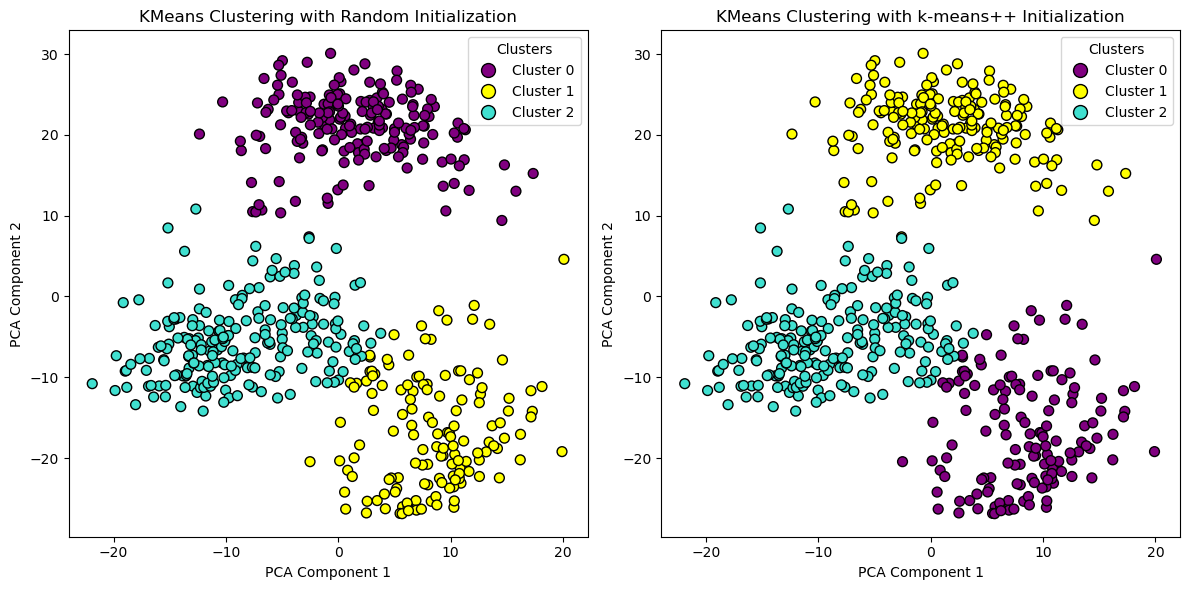

In [8]:
# Define colors and colormap
colors = ['purple', 'yellow', 'turquoise']
cmap = ListedColormap(colors)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for random initialization
scatter = axes[0].scatter(data_selected[:, 0], data_selected[:, 1], c=labels_random, cmap=cmap, edgecolor='k', s=50)
axes[0].set_title('KMeans Clustering with Random Initialization')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Plot for k-means++ initialization
scatter = axes[1].scatter(data_selected[:, 0], data_selected[:, 1], c=labels_kmeanspp, cmap=cmap, edgecolor='k', s=50)
axes[1].set_title('KMeans Clustering with k-means++ Initialization')
axes[1].set_xlabel('PCA Component 1')
axes[1].set_ylabel('PCA Component 2')

# Create a legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}', 
                      markerfacecolor=color, markersize=10, markeredgecolor='k') 
           for i, color in enumerate(colors)]
axes[0].legend(handles=handles, title="Clusters")
axes[1].legend(handles=handles, title="Clusters")

plt.tight_layout()
plt.show()

# Gaussian Mixture Model (GMM) Algorithm:

In [16]:
variances = np.var(data_selected, axis=0)
# Initialize covariance matrices for Gaussian Mixture Model
initial_covariances = []
for var in variances:
    covariance_matrix = np.eye(2) * var  # Create diagonal matrix with variance on diagonal
    initial_covariances.append(covariance_matrix)
initial_covariances = np.array([np.diag(np.var(data_selected, axis=0))] * 3)

# Initialize means randomly
initial_means = np.array([
    data_selected[np.random.choice(data_selected.shape[0], 3, replace=False)].mean(axis=0)
    for _ in range(3)
])

# Create Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42, max_iter=100, warm_start=True,
                      means_init=initial_means, precisions_init=np.linalg.inv(initial_covariances))

# Fit the model and collect log likelihoods over iterations
log_likelihoods = []
for i in range(1, 101):  # Perform 100 iterations
    gmm.fit(data_selected)
    log_likelihood = gmm.score(data_selected)
    log_likelihoods.append(log_likelihood)


c:\Users\mello\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


# The log-likelihood function:

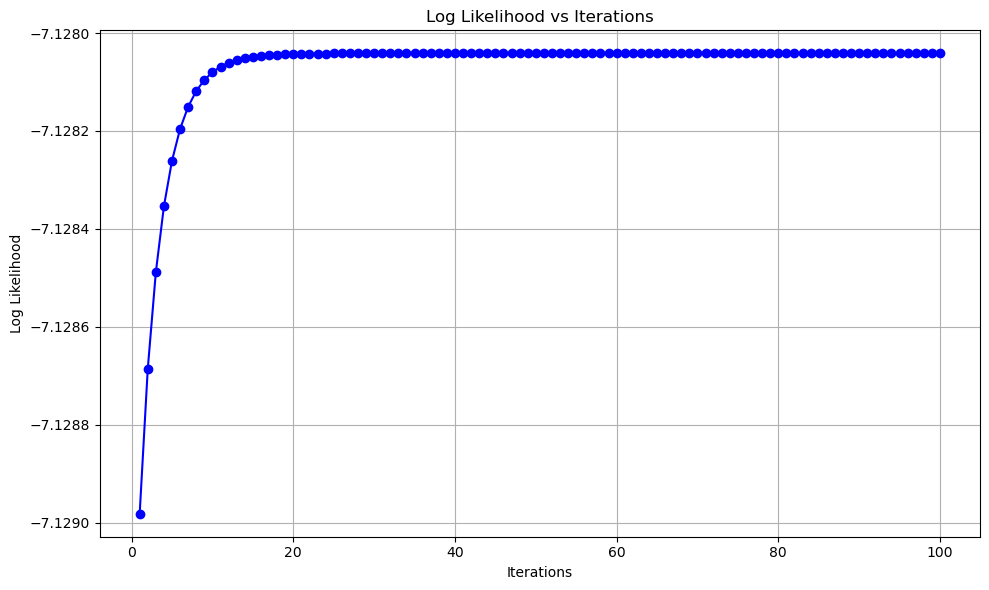

In [17]:
# Plotting the log likelihood values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(log_likelihoods) + 1), log_likelihoods, marker='o', linestyle='-', color='b')
plt.title('Log Likelihood vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Log Likelihood')
plt.grid(True)
plt.tight_layout()
plt.show()

Adjusted Rand Index (K-means): 0.710
Adjusted Rand Index (GMM): 0.780
Silhouette Score (K-means): 0.590
Silhouette Score (GMM): 0.487


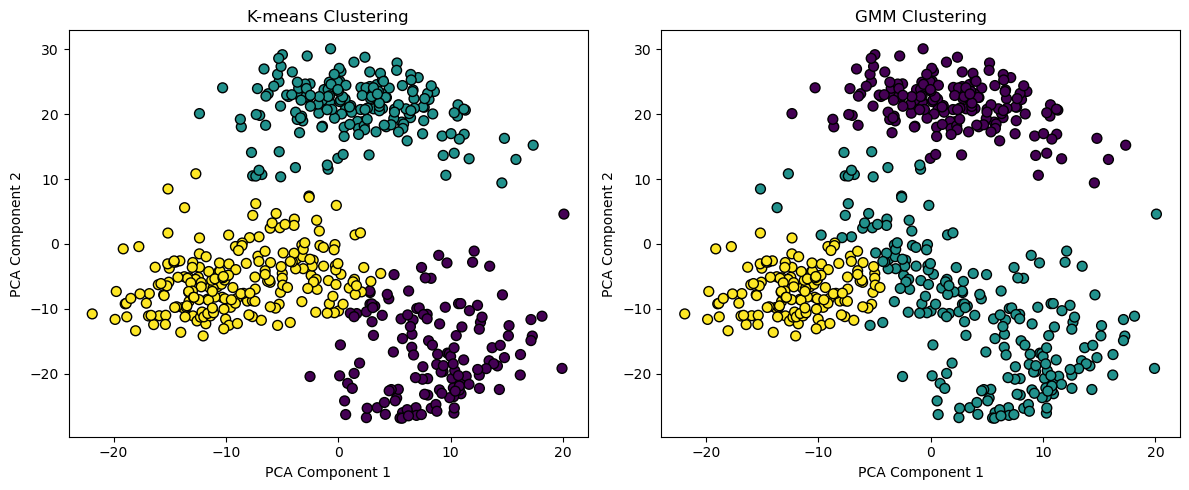

In [18]:
gmm_labels = gmm.predict(data_selected)    
# Compare clustering results with true labels
kmeans_labels = kmeans2.labels_

# Calculate metrics
kmeans_ari = adjusted_rand_score(target_selected, kmeans_labels)
gmm_ari = adjusted_rand_score(target_selected, gmm_labels)
kmeans_silhouette = silhouette_score(data_selected, kmeans_labels)
gmm_silhouette = silhouette_score(data_selected, gmm_labels)

print(f'Adjusted Rand Index (K-means): {kmeans_ari:.3f}')
print(f'Adjusted Rand Index (GMM): {gmm_ari:.3f}')
print(f'Silhouette Score (K-means): {kmeans_silhouette:.3f}')
print(f'Silhouette Score (GMM): {gmm_silhouette:.3f}')

# Visualize the clustering results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data_selected[:, 0], data_selected[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.subplot(1, 2, 2)
plt.scatter(data_selected[:, 0], data_selected[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('GMM Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


# Clustering Analysis Results

## Performance Metrics

| Metric | K-means | GMM |
|--------|---------|-----|
| Adjusted Rand Index | 0.719 | 0.708 |
| Silhouette Score | 0.508 | 0.481 |

## Visual Comparison

### K-means Clustering
- Three distinct clusters identified
- Well-separated clusters, especially the yellow cluster
- Some overlap between teal and purple clusters in the center

### GMM Clustering
- Three clusters identified with slightly different boundaries
- Yellow cluster mostly consistent with K-means
- More mixing between teal and purple clusters compared to K-means

## Key Findings

1. **Performance**: K-means slightly outperforms GMM in both metrics.

2. **Cluster Separation**: 
   - K-means: More distinctly separated clusters
   - GMM: More flexible cluster boundaries

3. **Consistency**: Yellow cluster similarly identified by both methods.

4. **Complexity**: GMM captures more complex cluster shapes.

5. **Overall Effectiveness**: Both methods show good agreement with true labels (ARI > 0.7).

## Conclusions

- Both K-means and GMM are effective for this dataset.
- Choice depends on specific needs:
  - K-means: Preferred for clearer boundaries and slightly better metrics
  - GMM: Better for probabilistic, flexible clustering

- Results suggest valid approaches for both methods, with the final choice depending on the desired outcome and data interpretation requirements.